In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import xgboost as xgb

Import data

In [ ]:
file_path = 'transactions.csv'
df = pd.read_csv(file_path)


df.head() 

,user_id,user_archetype,user_home_latitude,user_home_longitude,user_preferred_categories,transaction_id,timestamp,amount,merchant_id,merchant_name,...,transaction_latitude,transaction_longitude,distance_from_home,device_id,device_type,is_trusted_device,cvv_provided,three_d_secure,auth_attempts,is_fraud
0,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX001,2024-10-15 09:15:00,350.75,M001,Office Depot,...,44.0750,-70.5865,1.5,D001,desktop,True,True,authenticated,1,False
1,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX002,2024-10-20 12:45:00,175.00,M002,National Chain Restaurant,...,44.0810,-70.5750,2.0,D002,mobile,True,True,authenticated,1,False
2,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX003,2024-10-25 08:30:00,600.50,M003,Printing Service,...,44.0900,-70.5800,8.0,D003,tablet,False,True,not_authenticated,3,True
3,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX004,2024-10-28 14:20:00,820.10,M004,Home Hardware,...,43.9900,-70.5805,9.0,D004,mobile,True,True,authenticated,1,False
4,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX005,2024-11-01 18:05:00,265.00,M005,Local Grocer,...,44.0725,-70.5790,3.0,D005,desktop,True,True,authenticated,1,False


In [ ]:
#checking missing values
missing_values = df.isnull()

missing_count = df.isnull().sum()

print("\nTotal Missing Values per Column:")
print(missing_count)

any_missing = df.isnull().any().any()
print(f"\nDoes the dataset contain any missing values? {any_missing}")

missing_percentage = df.isnull().mean() * 100

print("\nPercentage of Missing Values per Column:")
print(missing_percentage)



Total Missing Values per Column:
user_id                      0
user_archetype               0
user_home_latitude           0
user_home_longitude          0
user_preferred_categories    0
transaction_id               0
timestamp                    0
amount                       0
merchant_id                  0
merchant_name                0
merchant_category            0
merchant_latitude            6
merchant_longitude           6
transaction_type             0
transaction_latitude         2
transaction_longitude        2
distance_from_home           1
device_id                    0
device_type                  0
is_trusted_device            0
cvv_provided                 0
three_d_secure               0
auth_attempts                0
is_fraud                     0
dtype: int64

Does the dataset contain any missing values? True

Percentage of Missing Values per Column:
user_id                      0.000000
user_archetype               0.000000
user_home_latitude           0.000000
us

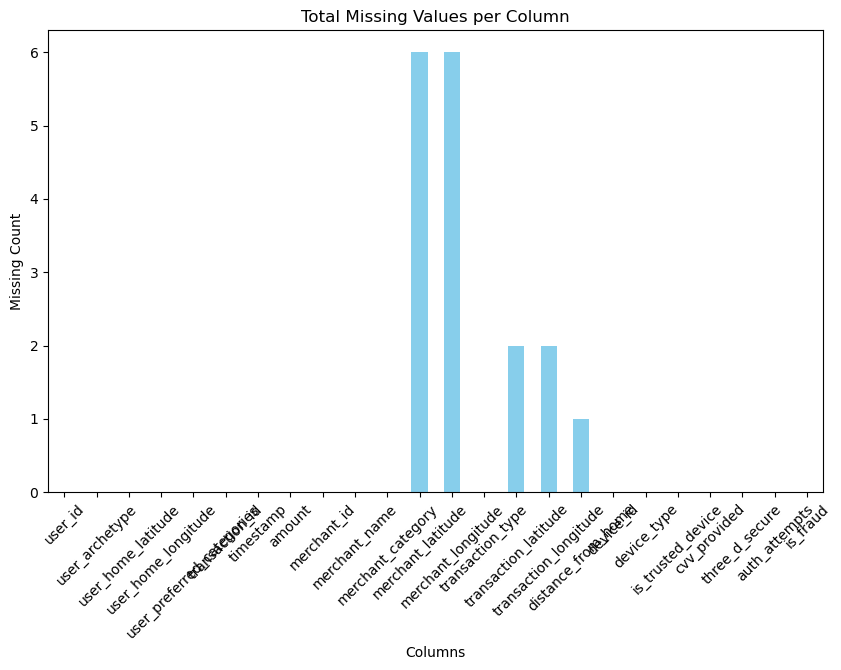


Does the dataset contain any missing values? True


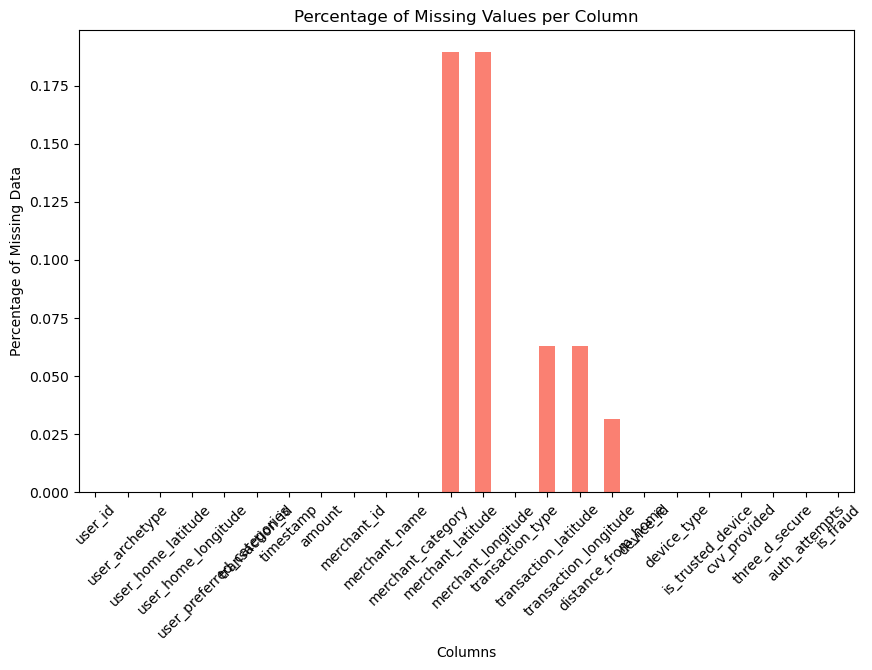

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull()

missing_count = df.isnull().sum()

#visualizing missing values
plt.figure(figsize=(10, 6))
missing_count.plot(kind='bar', color='skyblue')
plt.title("Total Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.xticks(rotation=45)
plt.show()

any_missing = df.isnull().any().any()
print(f"\nDoes the dataset contain any missing values? {any_missing}")

missing_percentage = df.isnull().mean() * 100

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='salmon')
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Data")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#replacing missing values with 0
df_filled = df.fillna(0)

print("\nMissing Values Count per Column (after handling):")
print(df_filled.isnull().sum())


Missing Values Count per Column (after handling):
user_id                      0
user_archetype               0
user_home_latitude           0
user_home_longitude          0
user_preferred_categories    0
transaction_id               0
timestamp                    0
amount                       0
merchant_id                  0
merchant_name                0
merchant_category            0
merchant_latitude            0
merchant_longitude           0
transaction_type             0
transaction_latitude         0
transaction_longitude        0
distance_from_home           0
device_id                    0
device_type                  0
is_trusted_device            0
cvv_provided                 0
three_d_secure               0
auth_attempts                0
is_fraud                     0
dtype: int64


In [113]:
df_filled['user_archetype_encoded'] = df_filled['user_archetype'].astype('category').cat.codes

In [114]:
df_filled['merchant_category_encoded'] = df_filled['merchant_category'].astype('category').cat.codes

In [115]:
df_filled['transaction_type_encoded'] = df_filled['transaction_type'].astype('category').cat.codes

In [116]:
df_filled['is_fraud_encoded'] = df_filled['is_fraud'].astype('category').cat.codes

In [117]:
df_eval = df_filled[['amount','distance_from_home','auth_attempts','user_archetype_encoded','merchant_category_encoded',
                     'transaction_type_encoded','is_fraud_encoded']]

In [118]:
df_test=df_filled
df_test.head()

,user_id,user_archetype,user_home_latitude,user_home_longitude,user_preferred_categories,transaction_id,timestamp,amount,merchant_id,merchant_name,...,device_type,is_trusted_device,cvv_provided,three_d_secure,auth_attempts,is_fraud,user_archetype_encoded,merchant_category_encoded,transaction_type_encoded,is_fraud_encoded
0,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX001,2024-10-15 09:15:00,350.75,M001,Office Depot,...,desktop,True,True,authenticated,1,False,8,28,0,0
1,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX002,2024-10-20 12:45:00,175.00,M002,National Chain Restaurant,...,mobile,True,True,authenticated,1,False,8,34,0,0
2,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX003,2024-10-25 08:30:00,600.50,M003,Printing Service,...,tablet,False,True,not_authenticated,3,True,8,32,0,1
3,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX004,2024-10-28 14:20:00,820.10,M004,Home Hardware,...,mobile,True,True,authenticated,1,False,8,22,0,0
4,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX005,2024-11-01 18:05:00,265.00,M005,Local Grocer,...,desktop,True,True,authenticated,1,False,8,21,0,0


In [119]:
is_fraud_encode = df_test[['is_fraud', 'is_fraud_encoded']].drop_duplicates()
is_fraud_encode = is_fraud_encode.sort_values(by='is_fraud')
is_fraud_encode

,is_fraud,is_fraud_encoded
0,False,0
2,True,1


In [120]:
user_archetype_encode = df_test[['user_archetype', 'user_archetype_encoded']].drop_duplicates()
user_archetype_encode = user_archetype_encode.sort_values(by='user_archetype_encoded')
user_archetype_encode

,user_archetype,user_archetype_encoded
600,College Student,0
210,Digital Nomad,1
50,Frugal Minimalist,2
10,Gig Economy Worker,3
220,Healthcare Worker,4
40,Luxury Shopper,5
30,Retiree,6
370,Rural Resident,7
0,Small Business Owner,8
80,Suburban Family,9


In [121]:
merchant_category_encode = df_test[['merchant_category', 'merchant_category_encoded']].drop_duplicates()
merchant_category_encode = merchant_category_encode.sort_values(by='merchant_category_encoded')
merchant_category_encode

,merchant_category,merchant_category_encoded
378,Agriculture,0
13,Automotive,1
273,Bakery Cafe,2
602,Books,3
700,Car Rental,4
1715,Chain Coffee Shop,5
272,Co-working,6
3039,Coffee Shop,7
14,Coffee Shops,8
83,Department Stores,9


In [122]:
transaction_type_encode = df_test[['transaction_type', 'transaction_type_encoded']].drop_duplicates()
transaction_type_encode = transaction_type_encode.sort_values(by='transaction_type_encoded')
transaction_type_encode

,transaction_type,transaction_type_encoded
0,in-person,0
5,online,1


In [123]:
df_eval = df_filled[['amount','distance_from_home','auth_attempts','user_archetype_encoded','merchant_category_encoded',
                     'transaction_type_encoded','is_fraud_encoded']]

In [124]:
df_test=df_filled
df_test.head()

,user_id,user_archetype,user_home_latitude,user_home_longitude,user_preferred_categories,transaction_id,timestamp,amount,merchant_id,merchant_name,...,device_type,is_trusted_device,cvv_provided,three_d_secure,auth_attempts,is_fraud,user_archetype_encoded,merchant_category_encoded,transaction_type_encoded,is_fraud_encoded
0,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX001,2024-10-15 09:15:00,350.75,M001,Office Depot,...,desktop,True,True,authenticated,1,False,8,28,0,0
1,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX002,2024-10-20 12:45:00,175.00,M002,National Chain Restaurant,...,mobile,True,True,authenticated,1,False,8,34,0,0
2,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX003,2024-10-25 08:30:00,600.50,M003,Printing Service,...,tablet,False,True,not_authenticated,3,True,8,32,0,1
3,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX004,2024-10-28 14:20:00,820.10,M004,Home Hardware,...,mobile,True,True,authenticated,1,False,8,22,0,0
4,002722e4-f618-4104-ae0e-c7613376fa03,Small Business Owner,44.079744,-70.580536,"Office Supplies,Professional Services,Restaura...",TX005,2024-11-01 18:05:00,265.00,M005,Local Grocer,...,desktop,True,True,authenticated,1,False,8,21,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_eval.drop(columns=['is_fraud_encoded'])
y = df_eval['is_fraud_encoded']

#selecting top 5 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['amount', 'distance_from_home', 'auth_attempts',
       'merchant_category_encoded', 'transaction_type_encoded'],
      dtype='object')


In [126]:
class_reports = []

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#predicting the test set
y_pred = model.predict(X_test)

#evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

("\nClassification Report:")
print(classification_report(y_test, y_pred))
report_1 = classification_report(y_test, y_pred, output_dict=True)
class_reports.append(report_1)

Accuracy: 0.93
Confusion Matrix:
[[563  10]
 [ 34  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       573
           1       0.73      0.44      0.55        61

    accuracy                           0.93       634
   macro avg       0.84      0.71      0.76       634
weighted avg       0.92      0.93      0.92       634



Accuracy: 0.93
Confusion Matrix:
[[563  10]
 [ 34  27]]


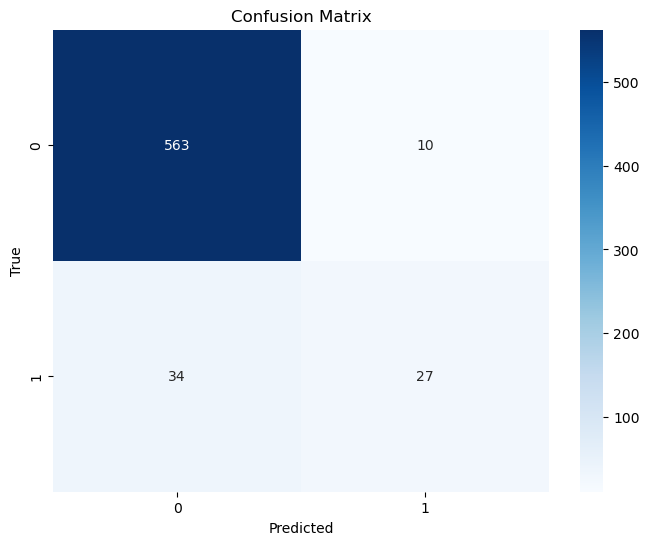

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
#parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#fitting the model with grid search
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

#evaluating the model with best hyperparameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metrics_df = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1", "Accuracy"])

model_name = "RandomForestClassifier" 
metrics = {
    "Model": [model_name],
    "Precision": [precision],
    "Recall": [recall],
    "F1": [f1],
    "Accuracy": [accuracy]
}

metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics)], ignore_index=True)

print(metrics_df)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Accuracy: 0.94
                    Model  Precision    Recall        F1  Accuracy
0  RandomForestClassifier   0.922524  0.930599  0.922813  0.930599


C:\Users\ashut\AppData\Local\Temp\ipykernel_15164\3908933996.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics)], ignore_index=True)


In [ ]:
#cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

Cross-validation scores: [0.92744479 0.92586751 0.93059937 0.9384858  0.93522907]
Mean cross-validation score: 0.93


In [ ]:
#Feature importances
importances = model.feature_importances_
indices = X.columns

for feature, importance in zip(indices, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: amount, Importance: 0.3052
Feature: distance_from_home, Importance: 0.2363
Feature: auth_attempts, Importance: 0.2205
Feature: user_archetype_encoded, Importance: 0.0815
Feature: merchant_category_encoded, Importance: 0.1044
Feature: transaction_type_encoded, Importance: 0.0520


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

model_name = "svm" 
metrics = {
    "Model": [model_name],
    "Precision": [precision],
    "Recall": [recall],
    "F1": [f1],
    "Accuracy": [accuracy]
}

metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics)], ignore_index=True)

print(metrics_df)

                    Model  Precision    Recall        F1  Accuracy
0  RandomForestClassifier   0.922524  0.930599  0.922813  0.930599
1                     svm   0.867253  0.903785  0.863879  0.903785


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9390
Confusion Matrix:
[[855   4]
 [ 54  38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       859
           1       0.90      0.41      0.57        92

    accuracy                           0.94       951
   macro avg       0.92      0.70      0.77       951
weighted avg       0.94      0.94      0.93       951



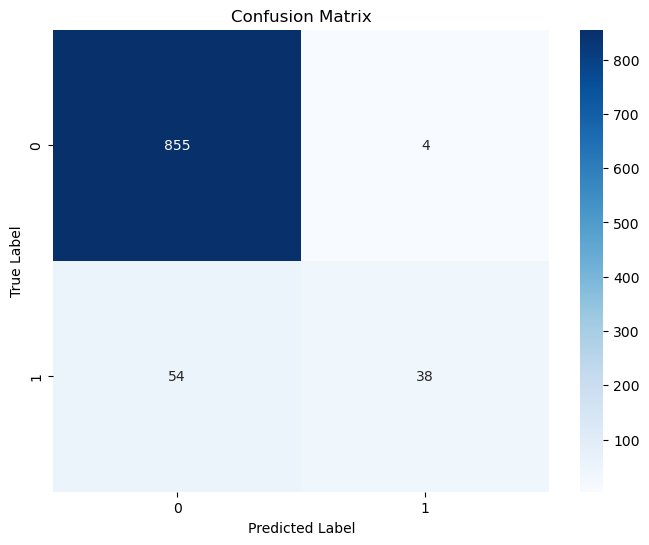

                    Model  Precision    Recall        F1  Accuracy
0  RandomForestClassifier   0.922524  0.930599  0.922813  0.930599
1                     svm   0.867253  0.903785  0.863879  0.903785
2      LogisticRegression   0.937128  0.939012  0.928496  0.939012


In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report_3 = classification_report(y_test, y_pred, output_dict=True)
class_reports.append(report_3)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


model_name = "LogisticRegression" 
metrics = {
    "Model": [model_name],
    "Precision": [precision],
    "Recall": [recall],
    "F1": [f1],
    "Accuracy": [accuracy]
}

metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics)], ignore_index=True)


print(metrics_df)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

report_4 = classification_report(y_test, y_pred, output_dict=True)
class_reports.append(report_4)

Accuracy: 0.9196

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       573
           1       0.61      0.44      0.51        61

    accuracy                           0.92       634
   macro avg       0.78      0.71      0.74       634
weighted avg       0.91      0.92      0.91       634


Confusion Matrix:
[[556  17]
 [ 34  27]]


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

model_name = "naive_bayes"
metrics = {
    "Model": [model_name],
    "Precision": [precision],
    "Recall": [recall],
    "F1": [f1],
    "Accuracy": [accuracy]
}

metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics)], ignore_index=True)

print(metrics_df)

                    Model  Precision    Recall        F1  Accuracy
0  RandomForestClassifier   0.922524  0.930599  0.922813  0.930599
1                     svm   0.867253  0.903785  0.863879  0.903785
2      LogisticRegression   0.937128  0.939012  0.928496  0.939012
3             naive_bayes   0.910744  0.919558  0.913634  0.919558


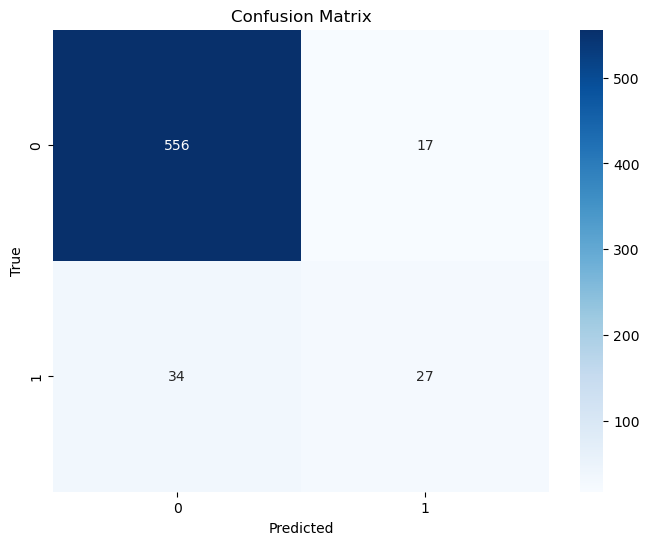

In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

#initialize xgboost model
model = xgb.XGBClassifier(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size at each iteration
    max_depth=6,            # Maximum depth of a tree
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',  # Evaluation metric
    use_label_encoder=False # Avoid warning about label encoder
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

report_5 = classification_report(y_test, y_pred, output_dict=True)
class_reports.append(report_5)

Accuracy: 0.9322
Confusion Matrix:
[[568   5]
 [ 38  23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       573
           1       0.82      0.38      0.52        61

    accuracy                           0.93       634
   macro avg       0.88      0.68      0.74       634
weighted avg       0.93      0.93      0.92       634



C:\Users\ashut\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:41:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

model_name = "xgboost"
metrics = {
    "Model": [model_name],
    "Precision": [precision],
    "Recall": [recall],
    "F1": [f1],
    "Accuracy": [accuracy]
}

metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics)], ignore_index=True)

print(metrics_df)

                    Model  Precision    Recall        F1  Accuracy
0  RandomForestClassifier   0.922524  0.930599  0.922813  0.930599
1                     svm   0.867253  0.903785  0.863879  0.903785
2      LogisticRegression   0.937128  0.939012  0.928496  0.939012
3             naive_bayes   0.910744  0.919558  0.913634  0.919558
4                 xgboost   0.926146  0.932177  0.920552  0.932177


Accuracy: 0.93
Confusion Matrix:
[[568   5]
 [ 38  23]]


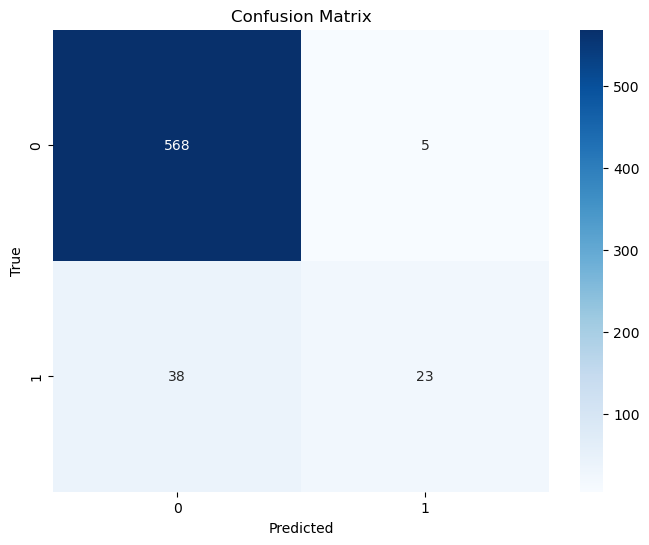

In [ ]:

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

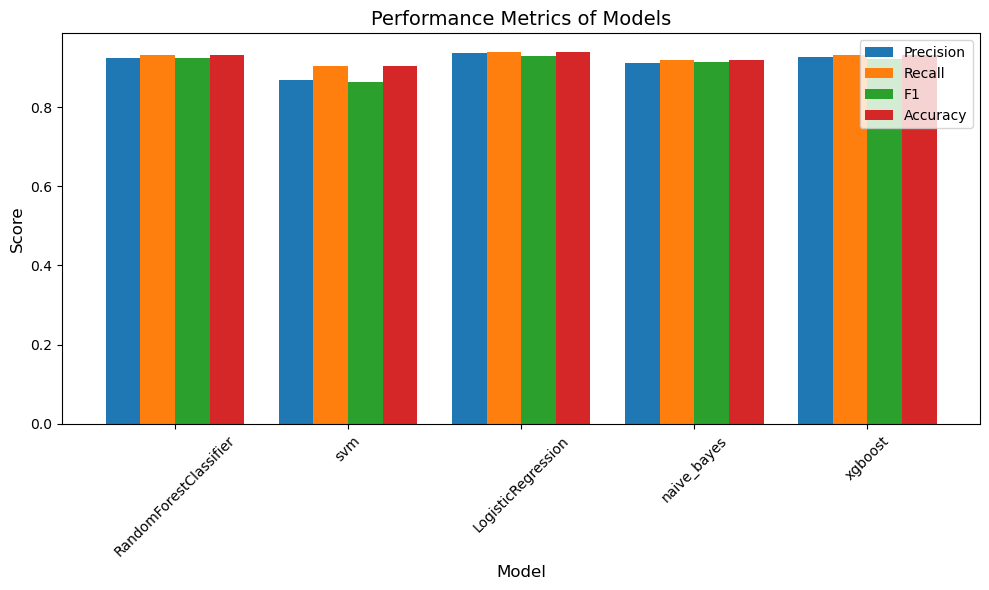

In [ ]:

metrics_df.set_index("Model", inplace=True)

ax = metrics_df.plot(kind="bar", figsize=(10, 6), width=0.8)

ax.set_title('Performance Metrics of Models', fontsize=14)
ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Model', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()